In [1]:
#!/usr/bin/env python3
# coding: utf-8
# import classy module
from classy import Class
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
common_settings = {
'N_ur': 3.05,
'perturbations_verbose':1,
'background_verbose':3,
'output':'mPk',
'gauge':'newtonian',
'P_k_max_1/Mpc':75,
'z_max_pk':3,
}

In [3]:
standardCDM = Class()
standardCDM.set(common_settings)
standardCDM.set({'omega_cdm':0.12})
standardCDM.compute()

In [4]:
dmcannCDM = Class()
# pass input parameters
dmcannCDM.set(common_settings)

mWDM = 800
alpha = 0.1


ocdm = 0.12038
tor= ( 93.14/ mWDM *ocdm)**(1./3.)*0.71611
Tg = 2.326e-4
aph=alpha
gD=1.5
astar =  (2.5/aph)**0.5*tor*Tg/mWDM*(0.9)
astar= 5.95092*(1./alpha)**.5 *((1000./mWDM)**(4./3.))*(3/2/gD)**(1./3.)*1.e-8

astar=1.e-8

klim=100
print(astar, alpha)
dmcannCDM.set({
    'omega_b':0.0223828,
    'omega_cdm': 0,
    'omega_canndm': 0.12,
    'perfectfluid':'y',
    'log10aNR': -6.3,
})
dmcannCDM.compute()

1e-08 0.1


In [5]:
kk = np.logspace(-2,np.log10(75),500) # k in h/Mpc
Pkcann = [] # P(k) in (Mpc/h)**3
Pkstand = [] # P(k) in (Mpc/h)**3
h = dmcannCDM.h() # get reduced Hubble for conversions to 1/Mpc
TK=[]
TkFit=[]

#fit from montepy
alpha=0.08365112896845585
beta=3.2373601276481914
gamma=-1.820943466856729


for k in kk:
    Pkcann.append(dmcannCDM.pk(k*h,0.)*h**3) # function .pk(k,z)
    Pkstand.append(standardCDM.pk(k*h,0.)*h**3 ) # function .pk(k,z)
    TK.append(dmcannCDM.pk(k*h,0)/standardCDM.pk(k*h,0))
    TkFit.append((1. + (alpha*k)**(beta))**(gamma))


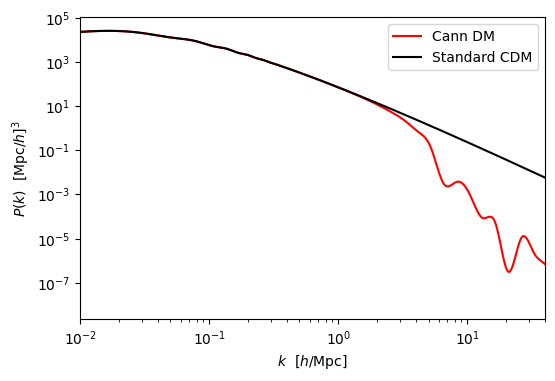

In [6]:
plt.figure(dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[464])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')

plt.plot(kk,Pkcann,'r-',label=r'Cann DM')
plt.plot(kk,Pkstand,'k-',label=r'Standard CDM')

plt.legend(loc='best')


plt.show()

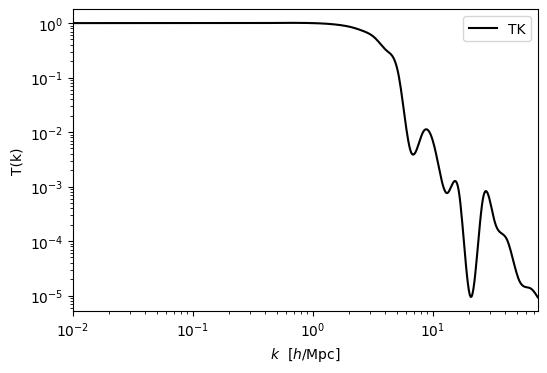

In [7]:
plt.figure(dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'T(k)')
#plt.plot(kk,Pkcann,'r-',label=r'Cann DM')
#plt.plot(kk,Pkstand,'k-',label=r'Standard CDM')
plt.plot(kk,TK,'k-',label=r'TK')
#plt.plot(kk,TkFit,'r-',label=r'TkFit')


plt.legend(loc='best')
#plt.savefig('latexfiles/complete_example_mpk.pdf',bbox_inches='tight')

plt.show()

In [2]:
dmcannCDM.empty()
standardCDM.empty()

NameError: name 'dmcannCDM' is not defined

In [12]:
print(kk[458])
print(Pkcann[458])
print(Pkstand[459])

13.860231784635772
0.0013361387354390137
0.09112973883743795
